# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# plotting
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# local modules
from modelproject import PrincipalAgentClass


# Model description

**Write out the model in equations here.** 
 

The principal owns a Joe and the Juice and employ an employee (Agent) to sell the juice. The agents utility function is given by $\frac{w^{1-\rho}}{1-\rho} - c \cdot e$, where w is the wage received, and $e=e^*$ when the employee stays home at night to be well-rested and $e=0$ when he goes partying. He has a reservation utility of $u$.

The employee can sell lots of juice and only a little juice. When the employee is hungover the probability of high juice sales is $\pi_0$. When the employee is not hungover, $e=e^*$ the probability is $\pi_1$.

The principal suggest a contract with a wage og $w_H$ if the employee sells a lot, and $w_L$ if the employee sells a little. 
The principal chooses $(w_L,w_H)$ so as to minimize expected wage payment and wants the employee to work hard:
$$\begin{align} \pi_e * w_H +(1-\pi_1)w_L
\end{align}$$

So the problem looks like the following:
$$ 
\begin{align*}
\min_{w_{h},w_{L}} \pi_1 \cdot w_H +(1-\pi_1)w_L \\
 \text{s.t.} \\
 \pi_1 (\frac{w_H^{1-\rho}}{1-\rho} -c \cdot e^*) + (1-\pi_1) (\frac{w_L^{1-\rho}}{1-\rho} -c \cdot e^*) \geq \bar{u} \\
 
 \pi_1 (\frac{w_H^{1-\rho}}{1-\rho} -c \cdot e^*) + (1-\pi_1) (\frac{w_L^{1-\rho}}{1-\rho} -c \cdot e^*) \geq \pi_0 (\frac{w_H^{1-\rho}}{1-\rho})+(1-\pi_0)(\frac{w_L^{1-\rho}}{1-\rho})
\end{align*}


$$

The IC-constraint can be rewritten:
$$
\begin{align*}
 \pi_1 (\frac{w_H^{1-\rho}}{1-\rho} -c \cdot e^*) + (1-\pi_1) (\frac{w_L^{1-\rho}}{1-\rho} -c \cdot e^*) \geq \pi_0 (\frac{w_H^{1-\rho}}{1-\rho})+(1-\pi_0)(\frac{w_L^{1-\rho}}{1-\rho}) \Longleftrightarrow \\
(\pi_1-\pi_0)\frac{w_H^{1-\rho}}{1-\rho} - (\pi_1-\pi_0)\frac{w_L^{1-\rho}}{1-\rho} \geq c\cdot e^* \Longleftrightarrow \\
\frac{w_H^{1-\rho}}{1-\rho} - \frac{w_L^{1-\rho}}{1-\rho} \geq \frac {c \cdot e^*}{\pi_1-\pi_0}
\end{align*}

## Analytical solution

**Defining functions**

In [2]:
pi_1 = sm.symbols('pi_1')
pi_0 = sm.symbols('pi_0')
wH = sm.symbols('w_H')
wL = sm.symbols('w_L')
rho = sm.symbols('rho')
c = sm.symbols('c')
estar = sm.symbols('e^*')
ubar = sm.symbols('ubar')

In [3]:
# defining objective function
objective = pi_1*wH +(1-pi_1)*wL
objective

pi_1*w_H + w_L*(1 - pi_1)

In [4]:
# defining utility if high wage
uH = wH**(1-rho)/(1-rho)
uH

w_H**(1 - rho)/(1 - rho)

In [5]:
# defining utility if low wage
uL = wL**(1-rho)/(1-rho)
uL

w_L**(1 - rho)/(1 - rho)

In [6]:
# defining participation constraint. Will bind in optimum. 
IRconstraint = sm.Eq(pi_1*(uH-c*estar) + (1-pi_1)*(uL-c*estar),ubar)
IRconstraint

Eq(pi_1*(-c*e^* + w_H**(1 - rho)/(1 - rho)) + (1 - pi_1)*(-c*e^* + w_L**(1 - rho)/(1 - rho)), ubar)

In [7]:
# defining participation constraint. Will bind in optimum. 
ICconstraint = sm.Eq(uH-uL,c*estar/(pi_1-pi_0))
ICconstraint

Eq(w_H**(1 - rho)/(1 - rho) - w_L**(1 - rho)/(1 - rho), c*e^*/(-pi_0 + pi_1))

**Solving for the optimal utilities**

In [8]:
# isolating uL from IR 
uL_from_IR = sm.solve(IRconstraint,uL)
uL_from_IR[0]

(-c*e^**rho + c*e^* - pi_1*w_H**(1 - rho) - rho*ubar + ubar)/(pi_1*rho - pi_1 - rho + 1)

In [9]:
# substitutig uL into IC
IC_subs = ICconstraint.subs(uL, uL_from_IR[0])
IC_subs

Eq(w_H**(1 - rho)/(1 - rho) - (-c*e^**rho + c*e^* - pi_1*w_H**(1 - rho) - rho*ubar + ubar)/(pi_1*rho - pi_1 - rho + 1), c*e^*/(-pi_0 + pi_1))

In [10]:
# isolating uH
uH_from_IC = sm.solve(IC_subs, uH)
uH_from_IC[0]

(-c*e^**pi_0*rho + c*e^**pi_0 + c*e^**rho - c*e^* - pi_0*pi_1*w_H**(1 - rho) - pi_0*rho*ubar + pi_0*ubar + pi_1**2*w_H**(1 - rho) + pi_1*rho*ubar - pi_1*ubar)/(pi_0*pi_1*rho - pi_0*pi_1 - pi_0*rho + pi_0 - pi_1**2*rho + pi_1**2 + pi_1*rho - pi_1)

In [11]:
# substituting uH into IC 
IC_subs1 = ICconstraint.subs(uH, uH_from_IC[0])
IC_subs1

Eq(-w_L**(1 - rho)/(1 - rho) + (-c*e^**pi_0*rho + c*e^**pi_0 + c*e^**rho - c*e^* - pi_0*pi_1*w_H**(1 - rho) - pi_0*rho*ubar + pi_0*ubar + pi_1**2*w_H**(1 - rho) + pi_1*rho*ubar - pi_1*ubar)/(pi_0*pi_1*rho - pi_0*pi_1 - pi_0*rho + pi_0 - pi_1**2*rho + pi_1**2 + pi_1*rho - pi_1), c*e^*/(-pi_0 + pi_1))

In [12]:
# isolating uL
uL_from_IC_subs1 = sm.solve(IC_subs1,uL)
uL_from_IC_subs1[0]

(-c*e^**rho + c*e^* - pi_1*w_H**(1 - rho) - rho*ubar + ubar)/(pi_1*rho - pi_1 - rho + 1)

**Solving for the optimal wages**

In [13]:
# can now solve for the high wage 
wH_solve = sm.solve(sm.Eq(uH_from_IC[0],uH),wH)
wH_solve[0]

((-c*e^**pi_0*rho + c*e^**pi_0 + c*e^**rho - c*e^* - pi_0*rho*ubar + pi_0*ubar + pi_1*rho*ubar - pi_1*ubar)/(pi_0 - pi_1))**(-1/(rho - 1))

In [14]:
# solving for wL
wL_solve = sm.solve(sm.Eq(uL_from_IC_subs1[0],uL),wL)
wL_solve[0]

((c*e^**rho**2 - 2*c*e^**rho + c*e^* + pi_1*rho*w_H**(1 - rho) - pi_1*w_H**(1 - rho) + rho**2*ubar - 2*rho*ubar + ubar)/(pi_1*rho - pi_1 - rho + 1))**(-1/(rho - 1))

In [15]:
# defining wL without wH (only with parameters from the model)
wL_without_wages = wL_solve[0].subs(wH,wH_solve[0])
wL_without_wages

((c*e^**rho**2 - 2*c*e^**rho + c*e^* + pi_1*rho*(((-c*e^**pi_0*rho + c*e^**pi_0 + c*e^**rho - c*e^* - pi_0*rho*ubar + pi_0*ubar + pi_1*rho*ubar - pi_1*ubar)/(pi_0 - pi_1))**(-1/(rho - 1)))**(1 - rho) - pi_1*(((-c*e^**pi_0*rho + c*e^**pi_0 + c*e^**rho - c*e^* - pi_0*rho*ubar + pi_0*ubar + pi_1*rho*ubar - pi_1*ubar)/(pi_0 - pi_1))**(-1/(rho - 1)))**(1 - rho) + rho**2*ubar - 2*rho*ubar + ubar)/(pi_1*rho - pi_1 - rho + 1))**(-1/(rho - 1))

**Making the solutions into lambda functions**

In [16]:
# low wage
wL_func = sm.lambdify(args=(pi_1,pi_0,rho,c,estar,ubar), expr=wL_without_wages)

In [17]:
# high wage 
wH_func = sm.lambdify(args=(pi_1,pi_0,rho,c,estar,ubar), expr=wH_solve)

## Numerical solution

In [18]:
model = PrincipalAgentClass()
par = model.par
sol = model.sol

initializing the model:


In [19]:
model.solve()

     fun: 9.248437500000117
     jac: array([0.69999993, 0.29999995])
 message: 'Optimization terminated successfully'
    nfev: 18
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([11.390625,  4.25    ])

In [20]:
# checking IC-constraint
exp_utility_high_effort = model.calc_utility(sol.wH,sol.wL,1)
exp_utility_low_effort = model.calc_utility(sol.wH,sol.wL,0)
IC_constraint = exp_utility_high_effort-exp_utility_low_effort
print(f'Expected utility when providing high effort {exp_utility_high_effort:.8f}')
print(f'Expected utility when providing low effort {exp_utility_low_effort:.8f}')
print(f'The IC-constraint is given by {IC_constraint:.8f}')


Expected utility when providing high effort 5.00000000
Expected utility when providing low effort 5.00000000
The IC-constraint is given by -0.00000000


In [21]:
# checking IR-constraint
IR_constraint = exp_utility_high_effort-par.ubar
print(f'Expected utility when providing high effort {exp_utility_high_effort:.8f}')
print(f'The reservation utility is given by {par.ubar:.8f}')
print(f'The IR-constraint is given by {IR_constraint:.8f}')

Expected utility when providing high effort 5.00000000
The reservation utility is given by 5.00000000
The IR-constraint is given by 0.00000000


In [22]:
# checking difference with analytical solution
wH_analytical = wH_func(par.pi_1,par.pi_0,par.rho,par.c,par.e,par.ubar)
wL_analytical = wL_func(par.pi_1,par.pi_0,par.rho,par.c,par.e,par.ubar)
print(f'W_H analytical is given by {wH_analytical[0]:.8f}, while the numerical is given by {sol.wH:.8f}')
print(f'W_L analytical is given by {wL_analytical:.8f}, while the numerical is given by {sol.wL:.8f}')

W_H analytical is given by 11.39062500, while the numerical is given by 11.39062500
W_L analytical is given by 4.51562500, while the numerical is given by 4.25000000


In [23]:
steps = 20
u_grid = np.linspace(1,10,steps)

wH_analytical_u = np.nan + np.zeros(steps)
wH_numerical_u = np.nan + np.zeros(steps)
wL_analytical_u = np.nan + np.zeros(steps)
wL_numerical_u = np.nan + np.zeros(steps)
IR_numerical_u = np.nan + np.zeros(steps)
IC_numerical_u = np.nan + np.zeros(steps)
IR_analytical_u = np.nan + np.zeros(steps)
IC_analytical_u = np.nan + np.zeros(steps)

**Checking more differences between numerical and analytical solutions**

In [24]:
for i,u in enumerate(u_grid):
    par.ubar = u
    model.solve()
    wH_numerical_u[i] = sol.wH
    wL_numerical_u[i] = sol.wL
    wH_analytical_u[i] = wH_func(par.pi_1,par.pi_0,par.rho,par.c,par.e,par.ubar)[0]
    wL_analytical_u[i] = wL_func(par.pi_1,par.pi_0,par.rho,par.c,par.e,par.ubar)
    IR_numerical_u[i] = model.calc_utility(sol.wH,sol.wL,1) - par.ubar
    IR_analytical_u[i] = model.calc_utility(wH_analytical_u[i],wL_analytical_u[i],1) - par.ubar
    IC_numerical_u[i] = model.calc_utility(sol.wH,sol.wL,1) - model.calc_utility(sol.wH,sol.wL,0)
    IC_analytical_u[i] = model.calc_utility(wH_analytical_u[i],wL_analytical_u[i],1) - model.calc_utility(wH_analytical_u[i],wL_analytical_u[i],0)

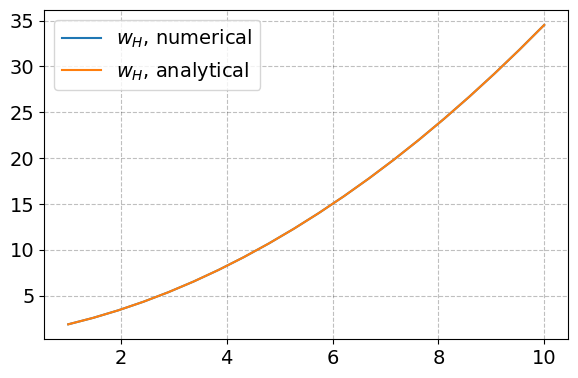

In [25]:
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(u_grid,wH_numerical_u,label=r'$w_H$, numerical')
ax.plot(u_grid,wH_analytical_u, label=r'$w_H$, analytical')
ax.legend(frameon=True)
fig.tight_layout()

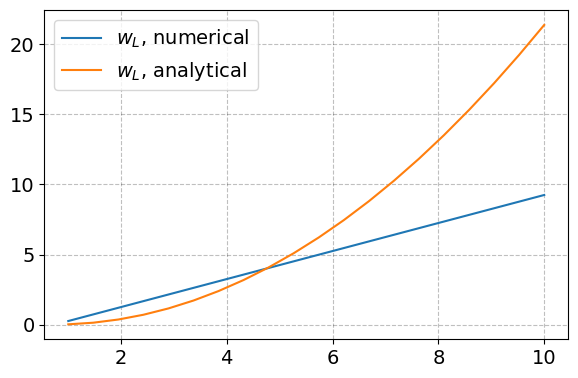

In [26]:
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(u_grid,wL_numerical_u,label=r'$w_L$, numerical')
ax.plot(u_grid,wL_analytical_u, label=r'$w_L$, analytical')
ax.legend(frameon=True)
fig.tight_layout()

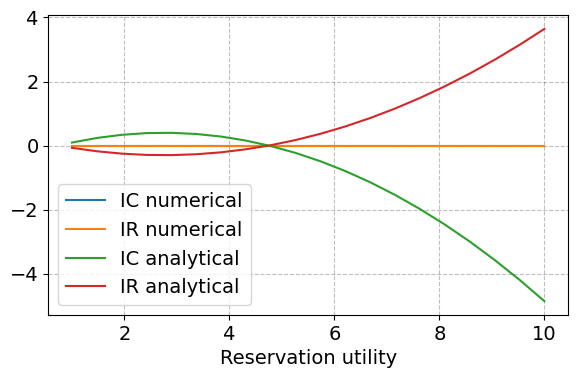

In [27]:
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(u_grid,IC_numerical_u,label=r'IC numerical')
ax.plot(u_grid,IR_numerical_u, label=r'IR numerical')
ax.plot(u_grid,IC_analytical_u,label=r'IC analytical')
ax.plot(u_grid,IR_analytical_u, label=r'IR analytical')
ax.set(xlabel ='Reservation utility')
ax.legend(frameon=True)
fig.tight_layout()

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 